# Data Analysis on Advertisement Campaign 

**Problem Statement:**
Use the data from the data set to analyze the click counts per day of the individual advertisement campaigns over a different period of time and identify/evaluate campaigns success on different base/perspective.


## Importing Libraries

### First, we will import all the python libraries that are required for this, which include NumPy for numerical calculations and scientific computing, Pandas for handling data, and Matplotlib and Seaborn for visualization.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

### Then we will load the data into the Pandas data frame.

In [2]:
df1=pd.read_csv('Campaign data.csv')

### We can observe the dataset by checking a few of the rows using the head() method, which returns the first five records from the dataset.

In [5]:
df1.head()

,Campaign id,Date,Click count
0,501,27-11-2018,1
1,501,4/12/2018,1
2,501,26-10-2018,1
3,501,25-10-2018,1
4,501,1/10/2018,1


### Using shape, we can observe the dimensions of the data

In [6]:
df1.shape

(4049, 3)

### info() method shows some of the characteristics of the data such as Column Name, No. of non-null values of our columns, Dtype of the data, and Memory Usage.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Campaign id  4049 non-null   int64 
 1   Date         4049 non-null   object
 2   Click count  4049 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 95.0+ KB


### Now Changing dtype of Date to datetime

In [8]:
df1['Date']=pd.to_datetime(df1['Date'])  

### We will use describe() method, which shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25, 0.50, 0.75 quartiles.

In [10]:
df1.describe()

,Campaign id,Click count
count,4049.000000,4049.00000
mean,11476.129662,1863.59916
std,3309.746263,4761.26369
min,501.000000,1.00000
25%,11801.000000,6.00000
50%,13001.000000,261.00000
75%,13304.000000,1808.00000
max,14601.000000,96052.00000


### Check the Null Values

In [11]:
df1.isnull().sum()

Campaign id    0
Date           0
Click count    0
dtype: int64

### Seperating Year,Month and Day from Date column

In [12]:
df1['Year']=df1['Date'].dt.year

In [13]:
df1['Month']=df1['Date'].dt.month
df1['Day']=df1['Date'].dt.day

### Since Campaign id is categorical

In [14]:
df1['Campaign id']=df1['Campaign id'].astype(object) 

In [15]:
df1.sample(20)

,Campaign id,Date,Click count,Year,Month,Day
3393,13501,2018-11-17,722,2018,11,17
1749,12506,2018-12-13,4,2018,12,13
3173,13305,2019-01-26,779,2019,1,26
1123,12501,2018-11-19,44,2018,11,19
616,6011,2019-10-01,1,2019,10,1
487,6010,2019-03-01,2,2019,3,1
1279,12502,2019-10-01,3307,2019,10,1
662,8801,2018-09-11,3045,2018,9,11
3305,13407,2019-01-20,153,2019,1,20
74,2202,2018-11-09,1,2018,11,9


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Campaign id  4049 non-null   object        
 1   Date         4049 non-null   datetime64[ns]
 2   Click count  4049 non-null   int64         
 3   Year         4049 non-null   int64         
 4   Month        4049 non-null   int64         
 5   Day          4049 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 189.9+ KB


In [17]:
df1['Campaign id'].unique()

array([501, 1001, 1002, 1003, 1401, 1402, 2201, 2202, 3001, 3002, 3003,
       3004, 3005, 3006, 3007, 6005, 6006, 6007, 6009, 6010, 6011, 8801,
       10201, 10901, 11801, 12501, 12502, 12503, 12504, 12505, 12506,
       12507, 13001, 13002, 13003, 13004, 13101, 13102, 13201, 13202,
       13203, 13204, 13301, 13302, 13303, 13304, 13305, 13401, 13402,
       13403, 13404, 13405, 13406, 13407, 13408, 13501, 13502, 13601,
       13701, 13801, 13802, 13901, 14001, 14002, 14101, 14102, 14103,
       14201, 14202, 14301, 14401, 14402, 14501, 14601], dtype=object)

In [18]:
df1['Year'].unique()

array([2018, 2019], dtype=int64)

### Seperate dataframes for 2018 and 2019 and adding Quaters column to both

In [19]:
df1_2018=df1[df1['Year']==2018]
df1_2019=df1[df1['Year']==2019]

In [20]:
df1_2018

,Campaign id,Date,Click count,Year,Month,Day
0,501,2018-11-27,1,2018,11,27
1,501,2018-04-12,1,2018,4,12
2,501,2018-10-26,1,2018,10,26
3,501,2018-10-25,1,2018,10,25
4,501,2018-01-10,1,2018,1,10
...,...,...,...,...,...,...
4003,14301,2018-12-21,16,2018,12,21
4004,14301,2018-12-20,8,2018,12,20
4005,14301,2018-12-19,28,2018,12,19
4025,14401,2018-12-28,13,2018,12,28


In [21]:
df1_2018['Quaters']=df1_2018['Month']

In [22]:
def month_to_quaters(x):
    if x>=1 and x<=3:
        return str(x).replace(str(x),'Q1')
    elif x>=4 and x<=6:
        return str(x).replace(str(x),'Q2')
    elif x>=7 and x<=9:
        return str(x).replace(str(x),'Q3')
    else:
        return str(x).replace(str(x),'Q4')

In [23]:
df1_2018['Quaters']=df1_2018['Quaters'].apply(month_to_quaters)

In [24]:
df1_2019

,Campaign id,Date,Click count,Year,Month,Day
23,2201,2019-10-01,1,2019,10,1
33,2201,2019-01-01,1,2019,1,1
38,2201,2019-03-01,1,2019,3,1
40,2201,2019-01-17,1,2019,1,17
59,2202,2019-10-01,1,2019,10,1
...,...,...,...,...,...,...
4044,14501,2019-01-21,2,2019,1,21
4045,14501,2019-01-31,2,2019,1,31
4046,14501,2019-01-30,6,2019,1,30
4047,14501,2019-01-18,18,2019,1,18


In [25]:
df1_2019['Quaters']=df1_2019['Month']

In [26]:
df1_2019['Quaters']=df1_2019['Quaters'].apply(month_to_quaters)

In [27]:
df1_2019

,Campaign id,Date,Click count,Year,Month,Day,Quaters
23,2201,2019-10-01,1,2019,10,1,Q4
33,2201,2019-01-01,1,2019,1,1,Q1
38,2201,2019-03-01,1,2019,3,1,Q1
40,2201,2019-01-17,1,2019,1,17,Q1
59,2202,2019-10-01,1,2019,10,1,Q4
...,...,...,...,...,...,...,...
4044,14501,2019-01-21,2,2019,1,21,Q1
4045,14501,2019-01-31,2,2019,1,31,Q1
4046,14501,2019-01-30,6,2019,1,30,Q1
4047,14501,2019-01-18,18,2019,1,18,Q1


### Month-wise analysis of different campaigns in 2018 and 2019

In [28]:
piv_2018=pd.pivot_table(df1_2018,index=['Month','Campaign id'],values=['Click count'],aggfunc=np.sum)
piv_2018

Click count
Month Campaign id             
1     501                    1
      1002                   1
      1401                   1
      1402                   1
      2201                   2
...                        ...
12    14103                  9
      14201                 43
      14202                  4
      14301                 73
      14401                 16

[503 rows x 1 columns]

In [29]:
piv_2019=pd.pivot_table(df1_2019,index=['Month','Campaign id'],values=['Click count'],aggfunc=np.sum)
piv_2019

Click count
Month Campaign id             
1     2201                   2
      2202                   5
      3001               47303
      3002                   2
      6009                  22
...                        ...
12    13601                 28
      13701                634
      14001                  4
      14101                176
      14102               2854

[422 rows x 1 columns]

Total click counts in 1 month


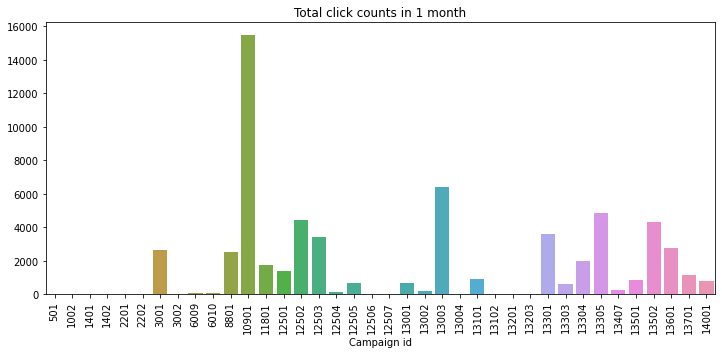

Total click counts in 2 month


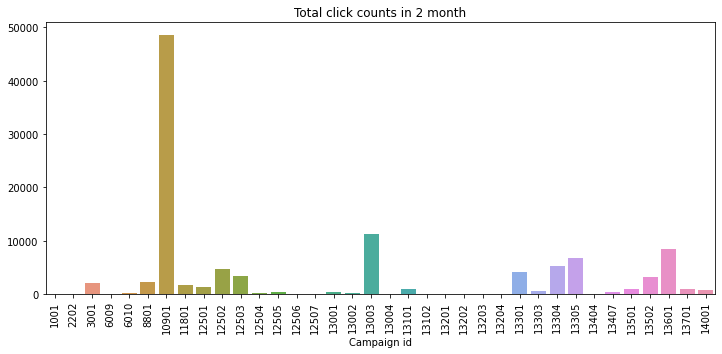

Total click counts in 3 month


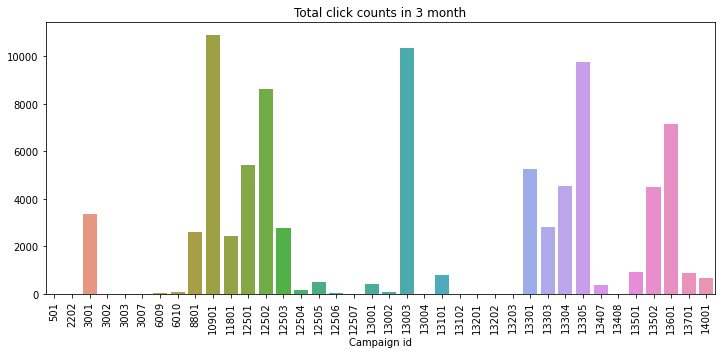

Total click counts in 4 month


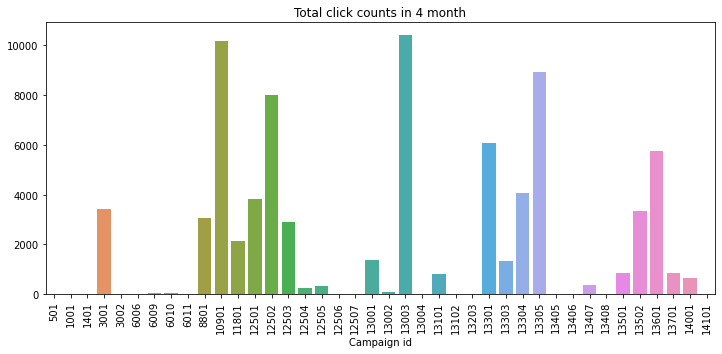

Total click counts in 5 month


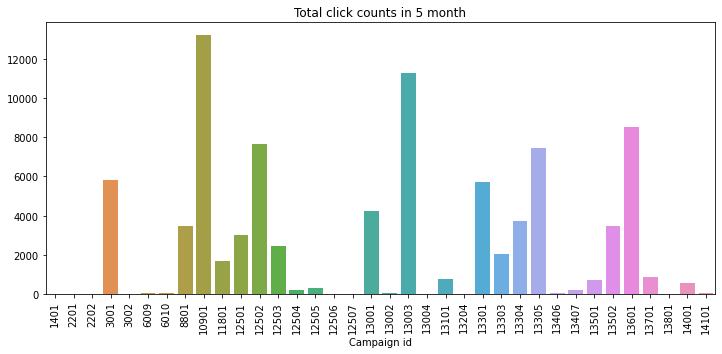

Total click counts in 6 month


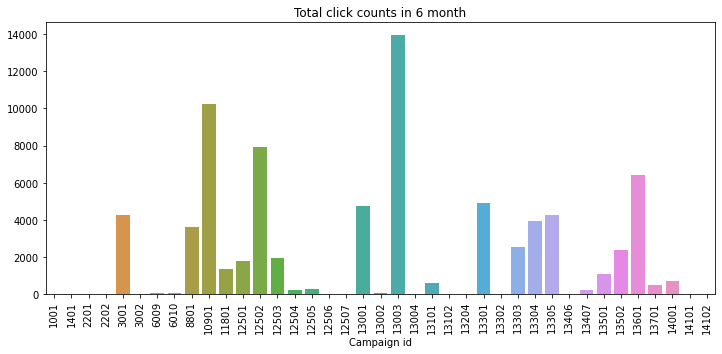

Total click counts in 7 month


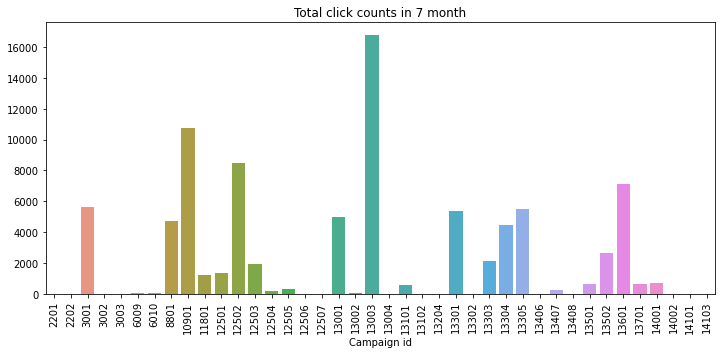

Total click counts in 8 month


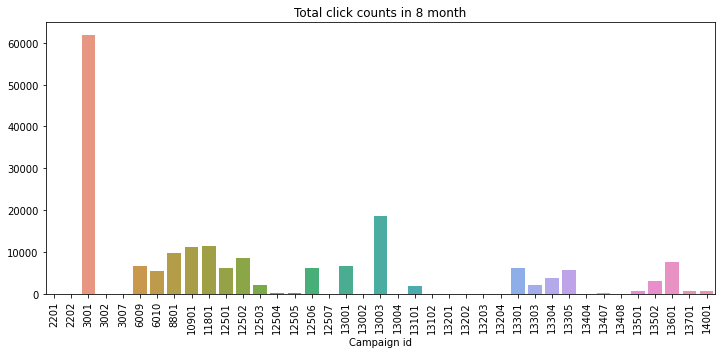

Total click counts in 9 month


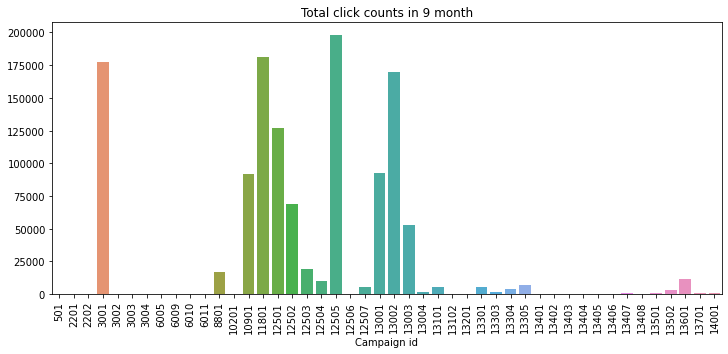

Total click counts in 10 month


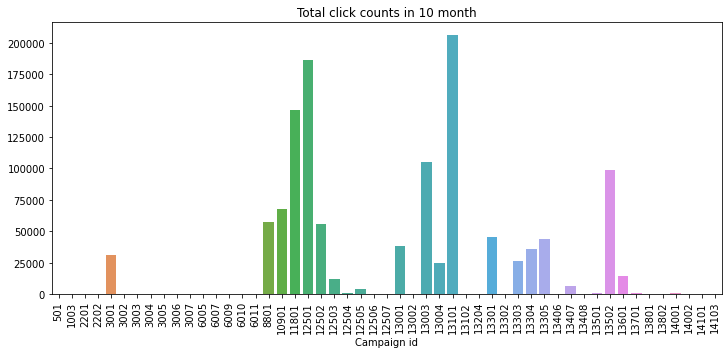

Total click counts in 11 month


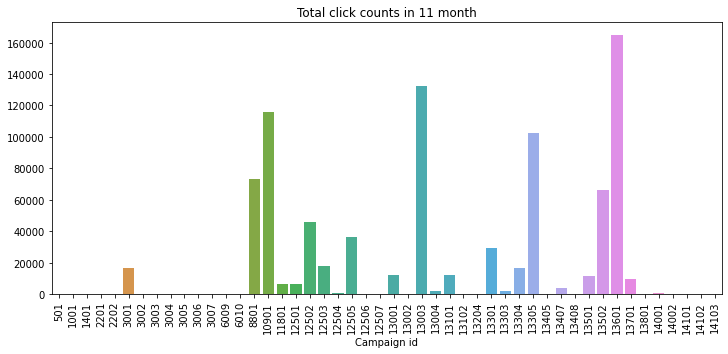

Total click counts in 12 month


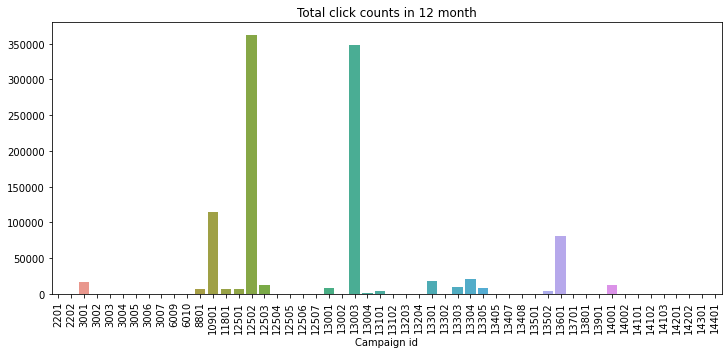

In [30]:
for i in range(1,13):
    print('Total click counts in {} month'.format(i))
    a=piv_2018.loc[i]['Click count'].values
    b=piv_2018.loc[i]['Click count'].index
    plt.figure(figsize=(12,5))
    sns.barplot(b,a)
    plt.title('Total click counts in {} month'.format(i))
    plt.xticks(rotation=90)
    plt.show()
    
   

Total click counts in 1 month


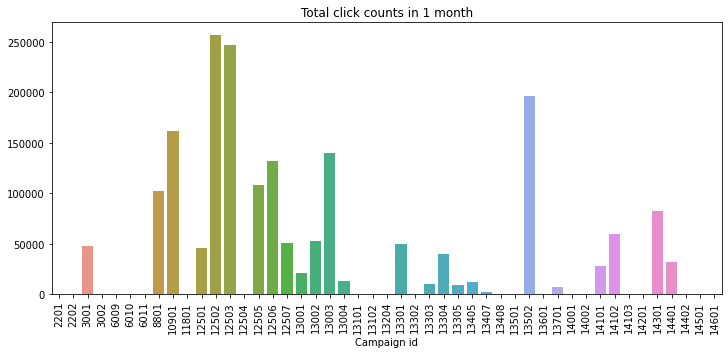

Total click counts in 2 month


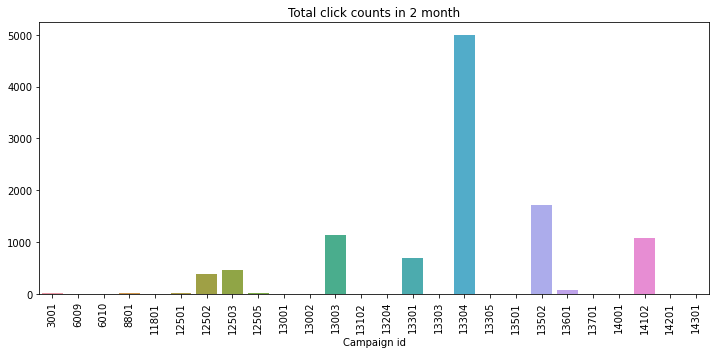

Total click counts in 3 month


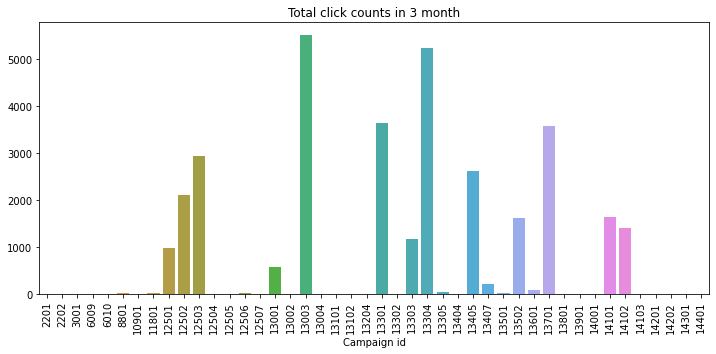

Total click counts in 4 month


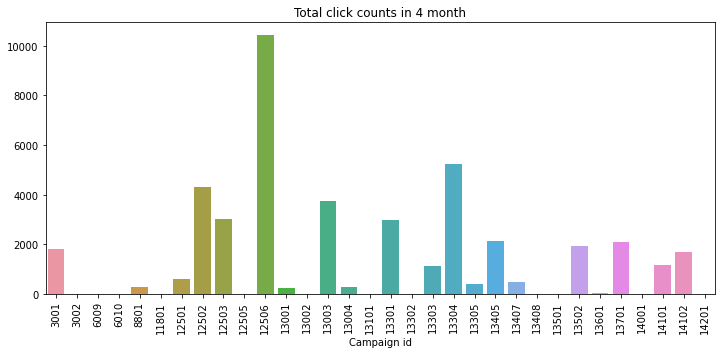

Total click counts in 5 month


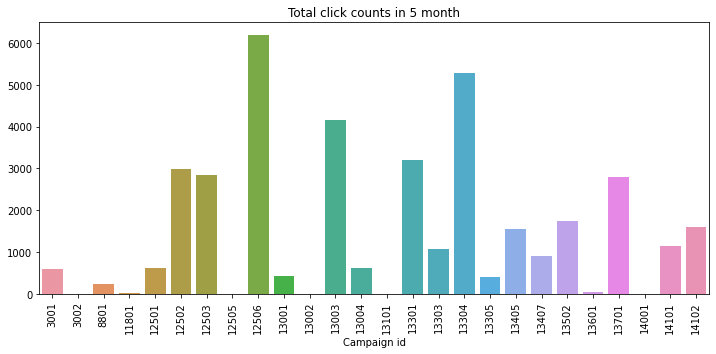

Total click counts in 6 month


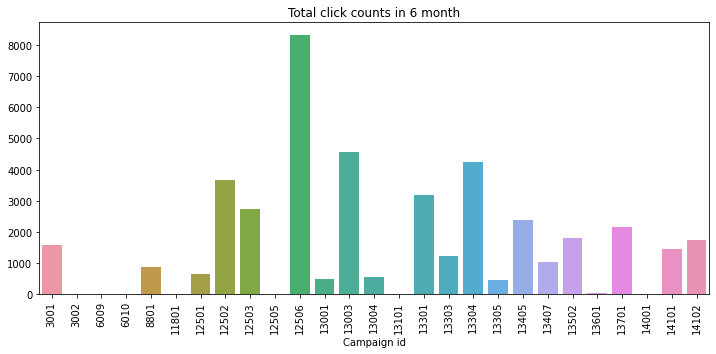

Total click counts in 7 month


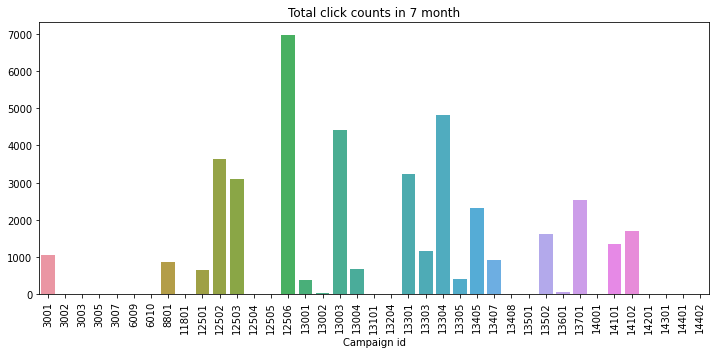

Total click counts in 8 month


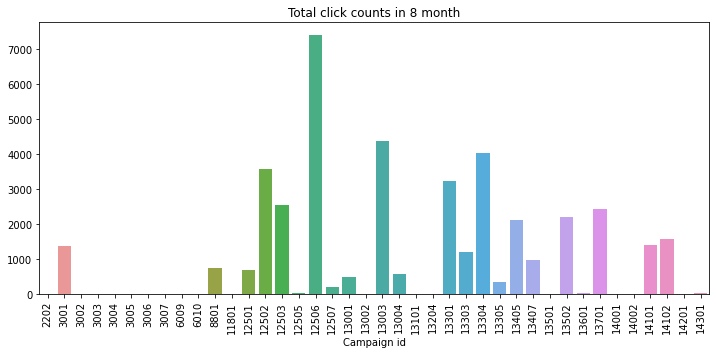

Total click counts in 9 month


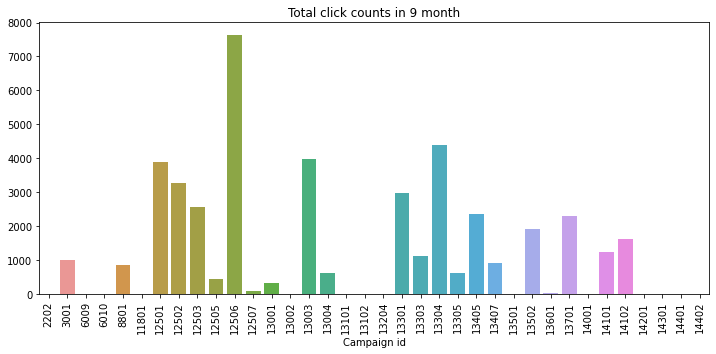

Total click counts in 10 month


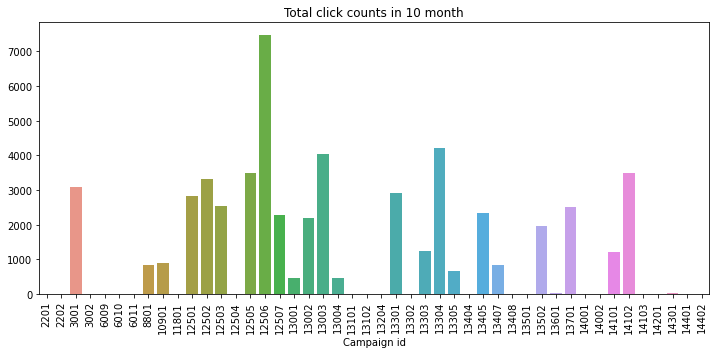

Total click counts in 11 month


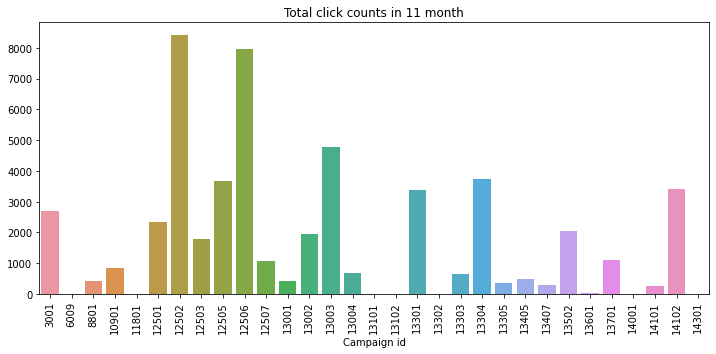

Total click counts in 12 month


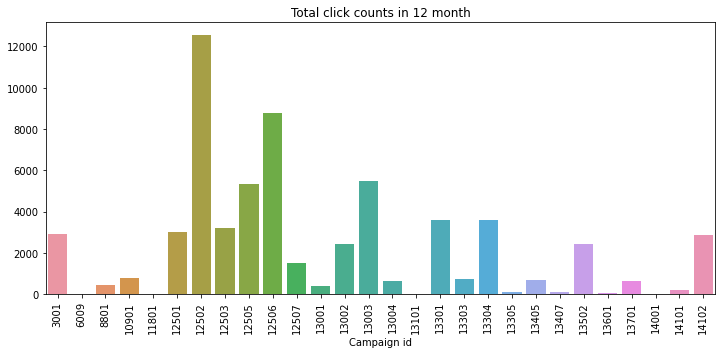

In [31]:
for i in range(1,13):
    print('Total click counts in {} month'.format(i))
    a=piv_2019.loc[i]['Click count'].values
    b=piv_2019.loc[i]['Click count'].index
    plt.figure(figsize=(12,5))
    sns.barplot(b,a)
    plt.title('Total click counts in {} month'.format(i))
    plt.xticks(rotation=90)
    plt.show()

### Quaterly analysis of different campaigns in 2018 and 2019

In [32]:
piv_quater_2018=pd.pivot_table(df1_2018,index=['Quaters','Campaign id'],values=['Click count'],aggfunc=np.sum)
piv_quater_2018

Click count
Quaters Campaign id             
Q1      501                    7
        1001                   1
        1002                   1
        1401                   1
        1402                   1
...                          ...
Q4      14103                 22
        14201                 43
        14202                  4
        14301                 73
        14401                 16

[206 rows x 1 columns]

Total click counts in Q1 quater


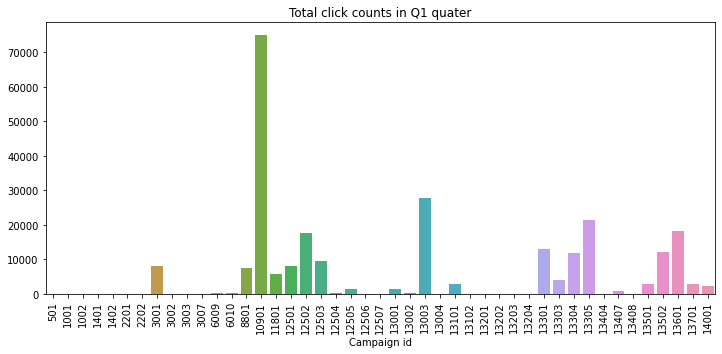

Total click counts in Q2 quater


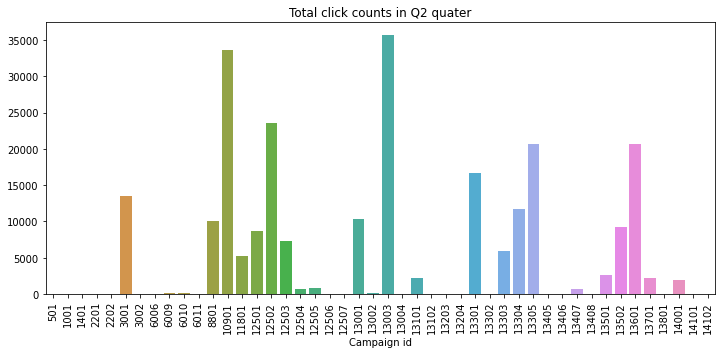

Total click counts in Q3 quater


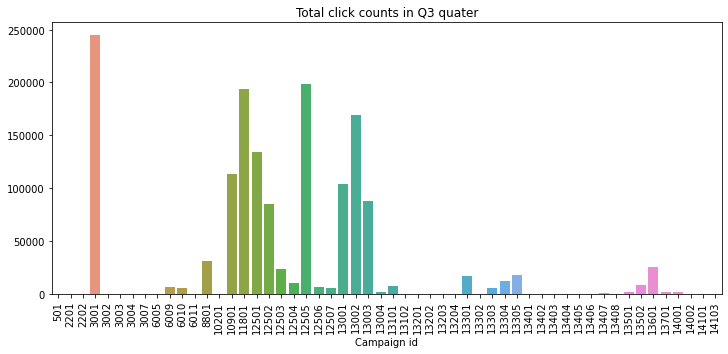

Total click counts in Q4 quater


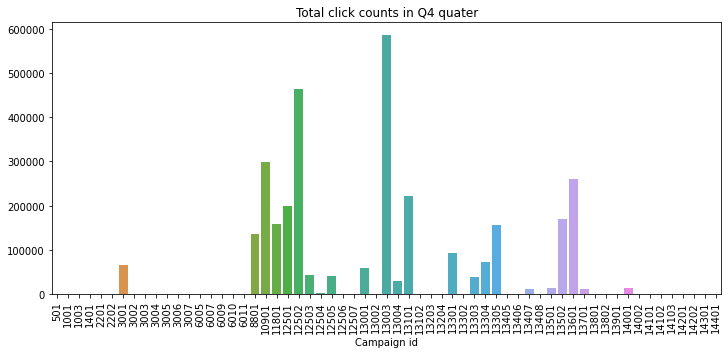

In [33]:
for i in ['Q1','Q2','Q3','Q4']:
    print('Total click counts in {} quater'.format(i))
    a=piv_quater_2018.loc[i]['Click count'].values
    b=piv_quater_2018.loc[i]['Click count'].index
    plt.figure(figsize=(12,5))
    sns.barplot(b,a)
    plt.title('Total click counts in {} quater'.format(i))
    plt.xticks(rotation=90)
    plt.show()

In [34]:
piv_quater_2019=pd.pivot_table(df1_2019,index=['Quaters','Campaign id'],values=['Click count'],aggfunc=np.sum)
piv_quater_2019

Click count
Quaters Campaign id             
Q1      2201                   3
        2202                   6
        3001               47329
        3002                   2
        6009                  25
...                          ...
Q4      14103                  1
        14201                  1
        14301                 21
        14401                  3
        14402                  1

[174 rows x 1 columns]

Total click counts in Q1 quater


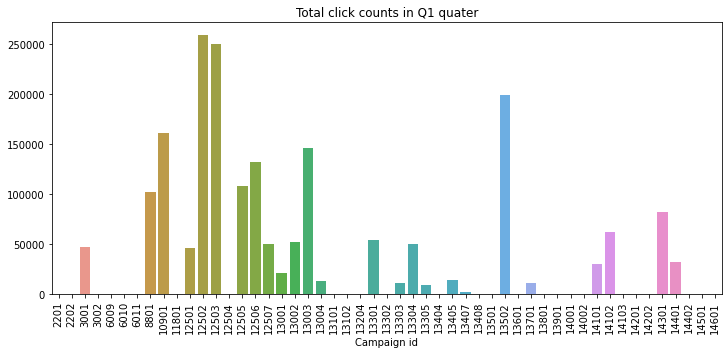

Total click counts in Q2 quater


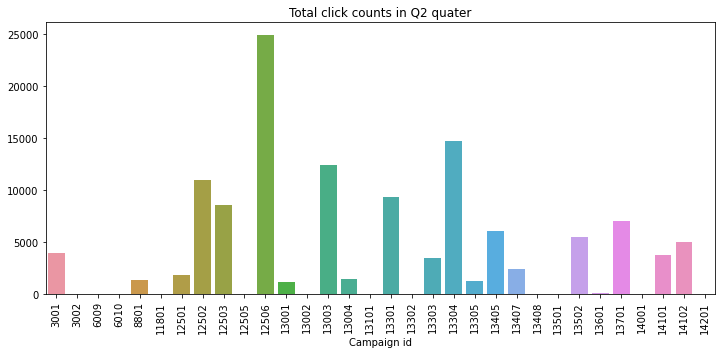

Total click counts in Q3 quater


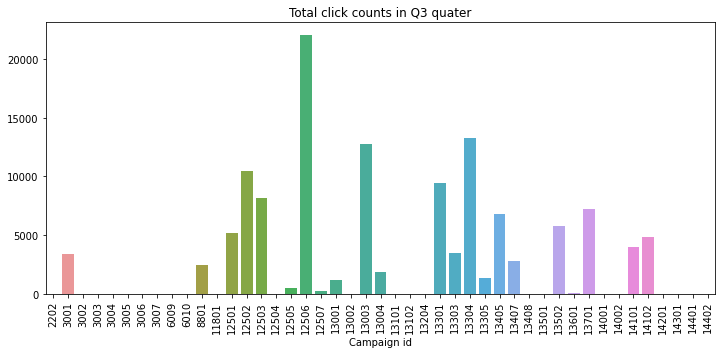

Total click counts in Q4 quater


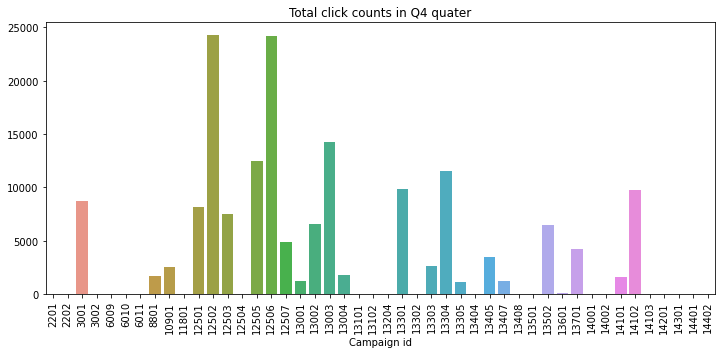

In [35]:
for i in ['Q1','Q2','Q3','Q4']:
    print('Total click counts in {} quater'.format(i))
    a=piv_quater_2019.loc[i]['Click count'].values
    b=piv_quater_2019.loc[i]['Click count'].index
    plt.figure(figsize=(12,5))
    sns.barplot(b,a)
    plt.title('Total click counts in {} quater'.format(i))
    plt.xticks(rotation=90)
    plt.show()

### Campagin ad analysis  in 2018 and 2019

<AxesSubplot:xlabel='Year'>

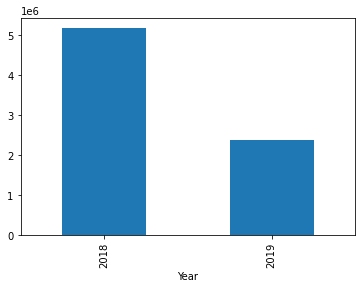

In [36]:
df1.groupby('Year')['Click count'].sum().plot(kind='bar')

In [37]:
arr_2018=df1_2018['Campaign id'].unique()
arr_2018

array([501, 1001, 1002, 1003, 1401, 1402, 2201, 2202, 3001, 3002, 3003,
       3004, 3005, 3006, 3007, 6005, 6006, 6007, 6009, 6010, 6011, 8801,
       10201, 10901, 11801, 12501, 12502, 12503, 12504, 12505, 12506,
       12507, 13001, 13002, 13003, 13004, 13101, 13102, 13201, 13202,
       13203, 13204, 13301, 13302, 13303, 13304, 13305, 13401, 13402,
       13403, 13404, 13405, 13406, 13407, 13408, 13501, 13502, 13601,
       13701, 13801, 13802, 13901, 14001, 14002, 14101, 14102, 14103,
       14201, 14202, 14301, 14401], dtype=object)

In [38]:
arr_2019=df1_2019['Campaign id'].unique()
arr_2019

array([2201, 2202, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 6009, 6010,
       6011, 8801, 10901, 11801, 12501, 12502, 12503, 12504, 12505, 12506,
       12507, 13001, 13002, 13003, 13004, 13101, 13102, 13204, 13301,
       13302, 13303, 13304, 13305, 13404, 13405, 13407, 13408, 13501,
       13502, 13601, 13701, 13801, 13901, 14001, 14002, 14101, 14102,
       14103, 14201, 14202, 14301, 14401, 14402, 14501, 14601],
      dtype=object)

### Campagin ads that happened in 2018 but opted out in 2019

In [39]:
print('Campaign ads that happened in 2018 but opted out in 2019','\n',np.setdiff1d(arr_2018,arr_2019))

Campaign ads that happened in 2018 but opted out in 2019 
 [501 1001 1002 1003 1401 1402 6005 6006 6007 10201 13201 13202 13203 13401
 13402 13403 13406 13802]


### Qunatity of new ad campaigns in 2019 that did not happen in 2018

In [40]:
print('Campaign ads that happened in 2019 but not in 2018','\n',np.setdiff1d(arr_2019,arr_2018))

Campaign ads that happened in 2019 but not in 2018 
 [14402 14501 14601]


In [41]:
df1_2019.groupby('Campaign id')['Click count'].sum().loc[[14402, 14501, 14601]]

Campaign id
14402    54
14501    35
14601     4
Name: Click count, dtype: int64

<AxesSubplot:xlabel='Campaign id'>

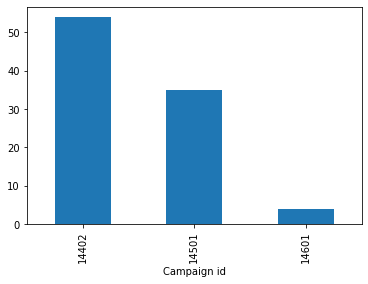

In [42]:
df1_2019.groupby('Campaign id')['Click count'].sum().loc[[14402, 14501, 14601]].plot(kind='bar')

### Campagin ads happening both in 2018  and 2019

In [43]:
print('Campaign ads that happened in both 2018 and 2019','\n',np.intersect1d(arr_2018,arr_2019))

Campaign ads that happened in both 2018 and 2019 
 [2201 2202 3001 3002 3003 3004 3005 3006 3007 6009 6010 6011 8801 10901
 11801 12501 12502 12503 12504 12505 12506 12507 13001 13002 13003 13004
 13101 13102 13204 13301 13302 13303 13304 13305 13404 13405 13407 13408
 13501 13502 13601 13701 13801 13901 14001 14002 14101 14102 14103 14201
 14202 14301 14401]


### Discounts to campaigns to increase revenue

1.Giving discount to 5 companies that had good number of click counts in 2018 but still opted out in 2019


2.Giving discount to 5 companies that are not doing good in 2019. So that they dont leave next year

In [44]:
disc_camp1=df1_2018.groupby(['Campaign id'])['Click count'].sum()
disc_camp2=df1_2019.groupby(['Campaign id'])['Click count'].sum()

In [45]:
disc_camp1.loc[[501,  1001,  1002,  1003,  1401,  1402,  6005,  6006,  6007,
       10201, 13201, 13202, 13203, 13401, 13402, 13403, 13406, 13802]].sort_values(ascending=False).head(5)


Campaign id
13406    108
13203     52
13201     31
501       15
13202     15
Name: Click count, dtype: int64

### Above list has camapaign adds which were there in 2018 but left in 2019

In [49]:
disc_camp1.loc[list(np.setdiff1d(arr_2018,arr_2019))].sort_values(ascending=False).head(5)

Campaign id
13406    108
13203     52
13201     31
501       15
13202     15
Name: Click count, dtype: int64

### 5 Campaign ads with least click in 2019

In [50]:
disc_camp2.sort_values(ascending=True).head(5) 

Campaign id
14202    1
13901    1
13801    1
3006     2
3007     2
Name: Click count, dtype: int64